# Hoop hopping

I saw [this video](https://www.youtube.com/watch?v=ETRpkp03stQ) today about how a massless hoop with a mass attached in one location will hop off the ground when it's rolled starting at the point when the mass is at the top.

So I thought I'd model it using a Lagrangian Multiplier technique so that we could easily see when the ground is pulling instead of pushing (that's when it would hop).

I'll describe the mass with location <xm[t], ym[t]>, the center of the hoop at <x[t], y[t]> and the rotation of the hoop with th (which stands for theta).

In [131]:
m=1;
mhoop=1;
r=1;
g=9.8;
omega=4;
xm[t_]:=x[t]+r Sin[th[t]];
ym[t_]:=y[t]+r Cos[th[t]];
KE=1/2 m (xm'[t]^2+ym'[t]^2)+1/2 mhoop (x'[t]^2+y'[t]^2)+1/2 (mhoop r^2) th'[t]^2;
PE=m g ym[t]+mhoop g y[t];
rollingConstraint=x[t]-r th[t];
normalConstraint=y[t]-r;
L=KE-PE;
el[a_]:=D[L,a[t]]-D[L,a'[t],t]+lmRolling[t] D[rollingConstraint,a[t]]+lmNormal[t] D[normalConstraint,a[t]]==0;
sol=First[NDSolve[{el/@{x,y,th},
          x[0]==0,
          y[0]==r,
          th[0]==0,
          x'[0]==r omega,
          y'[0]==0,
          th'[0]==omega,
          D[rollingConstraint,t,t]==0,
          D[normalConstraint,t,t]==0,
          WhenEvent[lmNormal[t]==0,"StopIntegration"]},{x,y,th,lmNormal,lmRolling},{t,0,10}]];
tmax=sol[[1,2,1,1,2]]

NDSolve::pdord: Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.

10.

In [25]:
x[tmax]/.sol

1.56978

2
{Sin[th[t]] th'[t]  - Cos[th[t]] th''[t] - x''[t] == 0, 
 
                            2
>   -9.8 + Cos[th[t]] th'[t]  + Sin[th[t]] th''[t] - y''[t] == 0, 
 
>   9.8 Sin[th[t]] + (-2 Sin[th[t]] th'[t] (Cos[th[t]] th'[t] + x'[t]) - 
 
>        2 Cos[th[t]] th'[t] (-(Sin[th[t]] th'[t]) + y'[t])) / 2 + 
 
>     (2 Sin[th[t]] th'[t] (Cos[th[t]] th'[t] + x'[t]) + 
 
>        2 Cos[th[t]] th'[t] (-(Sin[th[t]] th'[t]) + y'[t]) - 
 
                                          2
>        2 Cos[th[t]] (-(Sin[th[t]] th'[t] ) + Cos[th[t]] th''[t] + x''[t]) + 
 
                                          2
>        2 Sin[th[t]] (-(Cos[th[t]] th'[t] ) - Sin[th[t]] th''[t] + y''[t])) / 2 == 0}
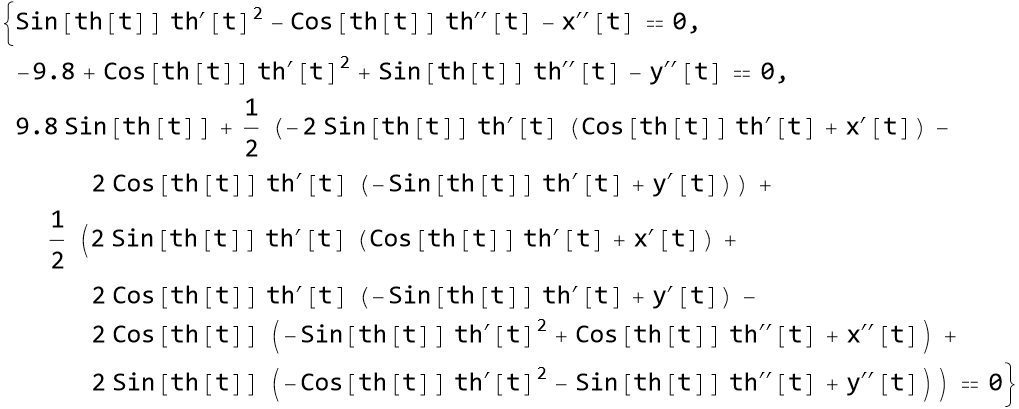

In [44]:
el2/@{x,y,th}

In [16]:
el2[a_]:=D[L,a[t]]-D[L,a'[t],t]==0;
xinit=x[tmax]/.sol
yinit=y[tmax]/.sol
thinit=th[tmax]/.sol
xvinit=x'[tmax]/.sol
yvinit=y'[tmax]/.sol
thvinit=th'[tmax]/.sol
sol2=First[NDSolve[{el2/@{x,y,th},
          x[tmax]==xinit,
          y[tmax]==yinit,
          th[tmax]==thinit,
          x'[tmax]==xvinit,
          y'[tmax]==yvinit,
          th'[tmax]==thvinit,
          WhenEvent[y[t]<r-0.01,"StopIntegration"]},{x,y,th},{t,tmax,tmax+2},Method->{"EquationSimplification"->"Residual"}]];
tmax2=sol2[[1,2,1,1,2]]

2.62059
1.
2.62059
39.2055
          -39
4.91073 10
39.2055
0.19477

-Graphics-
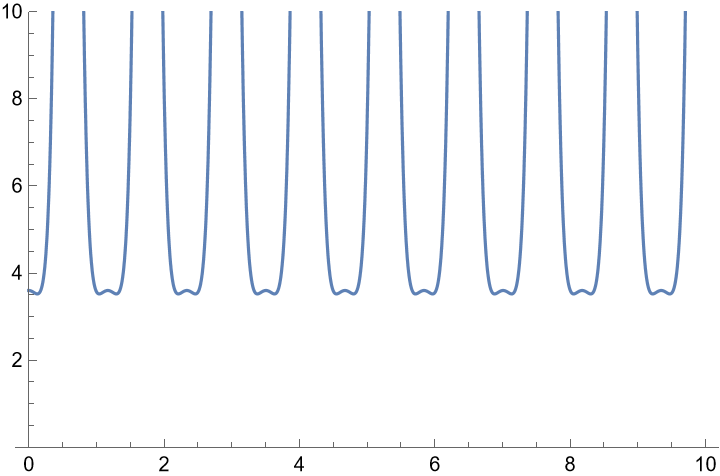

In [147]:
Plot[lmNormal[t]/.sol,{t,0,tmax},PlotRange->{0,10}]

In [151]:
2 9.8-m r omega^2

3.6

In [47]:
frame[t_]:=Show[Graphics[{Circle[{x[t],y[t]}/.sol], 
                PointSize[0.05],
                Red,
                Point[{xm[t],ym[t]}/.sol],
                Green,
                InfiniteLine[{0,0},{1,0}]}],PlotRange->{{-r,(x[tmax]+r)/.sol},{-0.1,2r+0.3}}]

In [32]:
y[tmax2]/.sol2

-24.8194

In [45]:
{tmax,tmax2}

{2.43475, 2.47835}

-Graphics-
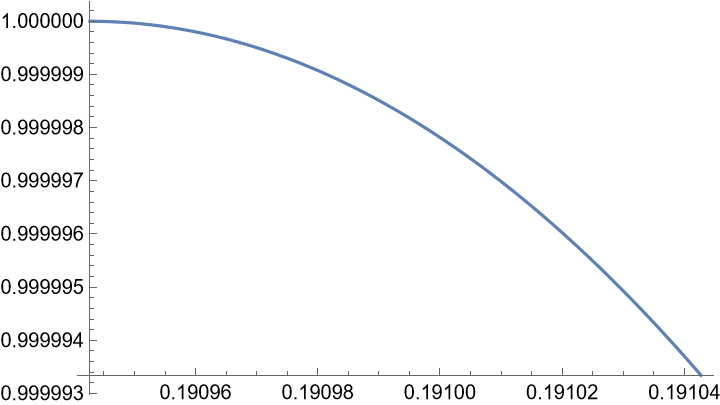

In [25]:
Plot[y[t]/.If[t>tmax,sol2,sol],{t,tmax,tmax+0.0001}]

Manipulate[PaneSelector[{1 -> -Graphics-, 2 -> -Graphics-, 3 -> -Graphics-, 
 
>     4 -> -Graphics-, 5 -> -Graphics-, 6 -> -Graphics-, 7 -> -Graphics-, 
 
>     8 -> -Graphics-, 9 -> -Graphics-, 10 -> -Graphics-, 11 -> -Graphics-, 
 
>     12 -> -Graphics-, 13 -> -Graphics-, 14 -> -Graphics-, 15 -> -Graphics-, 
 
>     16 -> -Graphics-, 17 -> -Graphics-, 18 -> -Graphics-, 19 -> -Graphics-, 
 
>     20 -> -Graphics-, 21 -> -Graphics-, 22 -> -Graphics-, 23 -> -Graphics-, 
 
>     24 -> -Graphics-, 25 -> -Graphics-, 26 -> -Graphics-, 27 -> -Graphics-, 
 
>     28 -> -Graphics-, 29 -> -Graphics-, 30 -> -Graphics-, 31 -> -Graphics-, 
 
>     32 -> -Graphics-, 33 -> -Graphics-, 34 -> -Graphics-, 35 -> -Graphics-, 
 
>     36 -> -Graphics-, 37 -> -Graphics-, 38 -> -Graphics-, 39 -> -Graphics-, 
 
>     40 -> -Graphics-, 41 -> -Graphics-, 42 -> -Graphics-, 43 -> -Graphics-, 
 
>     44 -> -Graphics-, 45 -> -Graphics-, 46 -> -Graphics-, 47 -> -Graphics-, 
 
>     48 -> -Graphics-, 49 -> -Graphics-, 50 -> -Graphics-, 51 -> -Graphics-, 
 
>     52 -> -Graphics-, 53 -> -Graphics-, 54 -> -Graphics-, 55 -> -Graphics-, 
 
>     56 -> -Graphics-, 57 -> -Graphics-, 58 -> -Graphics-, 59 -> -Graphics-, 
 
>     60 -> -Graphics-, 61 -> -Graphics-, 62 -> -Graphics-, 63 -> -Graphics-, 
 
>     64 -> -Graphics-, 65 -> -Graphics-, 66 -> -Graphics-, 67 -> -Graphics-, 
 
>     68 -> -Graphics-, 69 -> -Graphics-, 70 -> -Graphics-, 71 -> -Graphics-, 
 
>     72 -> -Graphics-, 73 -> -Graphics-, 74 -> -Graphics-, 75 -> -Graphics-, 
 
>     76 -> -Graphics-, 77 -> -Graphics-, 78 -> -Graphics-, 79 -> -Graphics-, 
 
>     80 -> -Graphics-, 81 -> -Graphics-, 82 -> -Graphics-, 83 -> -Graphics-, 
 
>     84 -> -Graphics-, 85 -> -Graphics-, 86 -> -Graphics-, 87 -> -Graphics-, 
 
>     88 -> -Graphics-, 89 -> -Graphics-, 90 -> -Graphics-, 91 -> -Graphics-, 
 
>     92 -> -Graphics-, 93 -> -Graphics-, 94 -> -Graphics-, 95 -> -Graphics-, 
 
>     96 -> -Graphics-, 97 -> -Graphics-, 98 -> -Graphics-, 99 -> -Graphics-, 
 
>     100 -> -Graphics-, 101 -> -Graphics-}, Dynamic[i14], ImageSize -> All, 
 
>    Alignment -> Automatic, BaseStyle -> ListAnimateCore, 
 
>    TransitionDirection -> Horizontal, TransitionDuration -> 0.5, 
 
>    TransitionEffect -> Automatic], 
 
>   {{i14, 1, }, 1, 101, 1, AnimationRate -> Automatic, DisplayAllSteps -> True, 
 
>    AppearanceElements -> 
 
>     {ProgressSlider, PlayPauseButton, FasterSlowerButtons, DirectionButton}}, 
 
>   ControlType -> Animator, AppearanceElements -> None, 
 
>   DefaultBaseStyle -> ListAnimate, DefaultLabelStyle -> ListAnimateLabel, 
 
>   SynchronousUpdating -> True, Method -> 
 
>    {DynamicCore -> False, TemplateExpand -> True}, 
 
>   Bookmarks -> {min :> {i14 = 1}, max :> {i14 = 101}}]
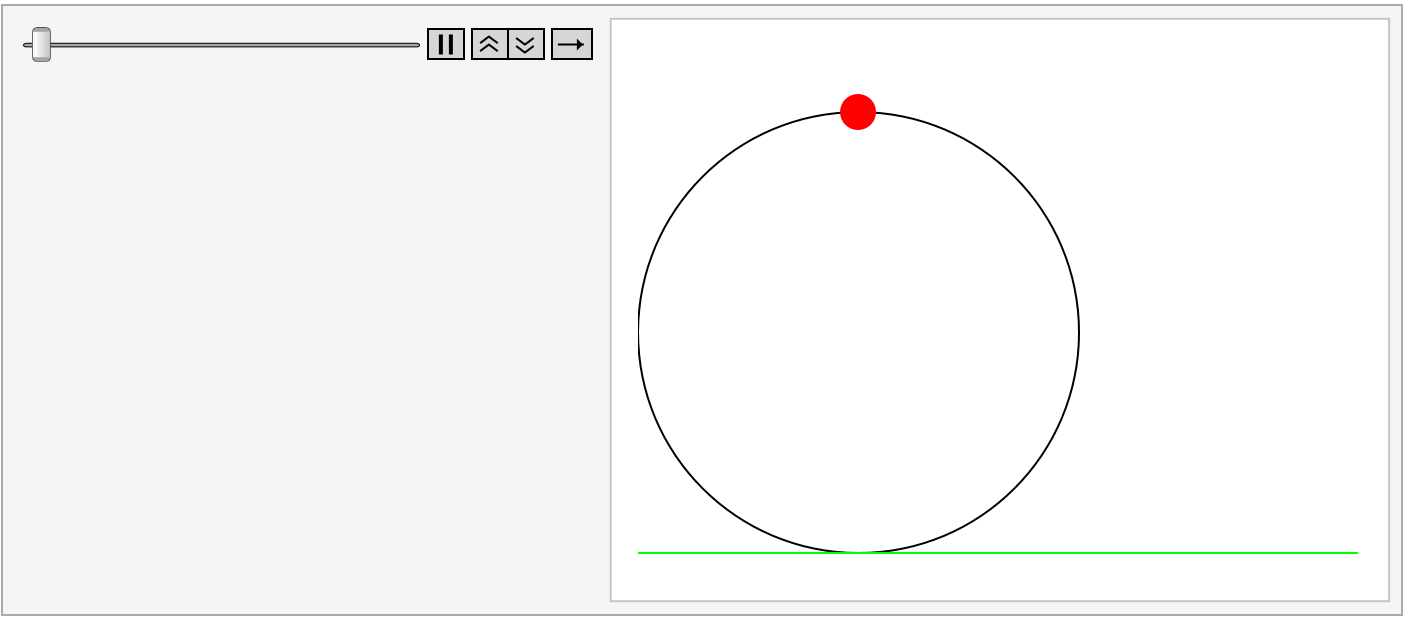

In [111]:
frames=Table[frame[t],{t,0,tmax,tmax/100}];
ListAnimate[frames]

In [113]:
Export["C:\\Users\\arundquist\\Downloads\\m 1 mhoop 1 omega 5.gif",frames]

C:\Users\arundquist\Downloads\m 1 mhoop 1 omega 5.gif